In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,f1_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout


In [ ]:
train_images = pd.read_csv("/content/csvTrainImages 13440x1024.csv", header=None)
train_labels = pd.read_csv("/content/csvTrainLabel 13440x1.csv", header=None)
test_images = pd.read_csv("/content/csvTestImages 3360x1024.csv", header=None)
test_labels = pd.read_csv("/content/csvTestLabel 3360x1.csv", header=None)

In [ ]:
print(train_images.shape)

(13440, 1024)


In [ ]:
train_labels.columns

Int64Index([0], dtype='int64')

In [ ]:
unique_classes, counts = np.unique(train_labels.iloc[:, 0], return_counts=True)

print("Number of unique classes:", len(unique_classes))
print("Distribution of samples in each class:")
for class_label, count in zip(unique_classes, counts):
    print(f"Class {class_label}: {count} samples")

Number of unique classes: 28
Distribution of samples in each class:
Class 1: 480 samples
Class 2: 480 samples
Class 3: 480 samples
Class 4: 480 samples
Class 5: 480 samples
Class 6: 480 samples
Class 7: 480 samples
Class 8: 480 samples
Class 9: 480 samples
Class 10: 480 samples
Class 11: 480 samples
Class 12: 480 samples
Class 13: 480 samples
Class 14: 480 samples
Class 15: 480 samples
Class 16: 480 samples
Class 17: 480 samples
Class 18: 480 samples
Class 19: 480 samples
Class 20: 480 samples
Class 21: 480 samples
Class 22: 480 samples
Class 23: 480 samples
Class 24: 480 samples
Class 25: 480 samples
Class 26: 480 samples
Class 27: 480 samples
Class 28: 480 samples


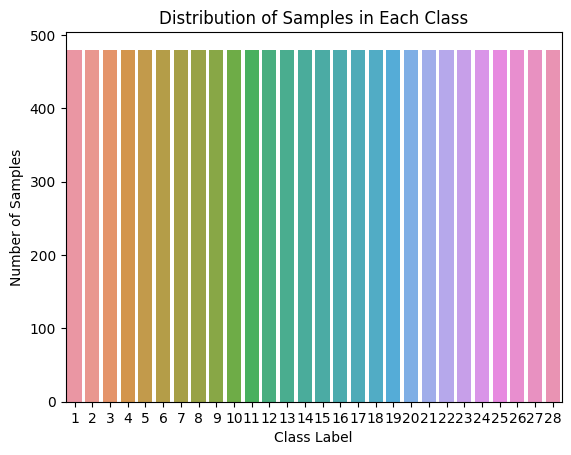

In [ ]:
sns.barplot(x=unique_classes, y=counts, linewidth=10)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Distribution of Samples in Each Class")
plt.show()

In [ ]:
def Normalize_Image(train_images,test_images):
  train_images = train_images / 255.0
  test_images = test_images / 255.0
  return train_images, test_images

In [ ]:
Normalized_train_images, Normalized_test_images = Normalize_Image(train_images,test_images)

In [ ]:
def reconstruct(Normalized_image):
  image_shape = Normalized_image.values.reshape(32, 32)
  return image_shape

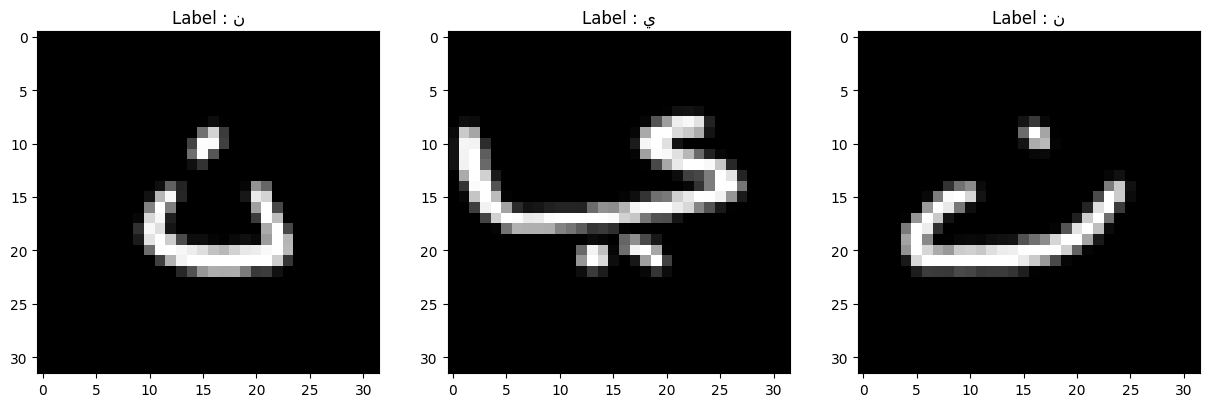

In [ ]:

Arabic_letters = [ 'أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د','ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط',
    'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م','ن', 'ه', 'و', 'ي']

images_length = len(Normalized_train_images)

visualization_images = 3
fig, axs = plt.subplots(1, visualization_images, figsize=(15, 5))
for i in range(visualization_images):
    random_index = np.random.randint(images_length)
    Normalized_image = Normalized_train_images.iloc[random_index, : ]
    image = reconstruct(Normalized_image)
    label = train_labels.iloc[random_index, 0]
    axs[i].imshow(image.T, cmap='gray',origin='upper')
    axs[i].set_title(f"Label : {Arabic_letters[label-1]}")

plt.show()

In [ ]:
print(Normalized_train_images.shape, train_labels.shape)

(13440, 1024) (13440, 1)


In [ ]:
clean_data=Normalized_train_images.dropna()

In [ ]:
classifier = svm.SVC(kernel='linear')

classifier.fit(clean_data, train_labels)

y_predicted = classifier.predict(Normalized_test_images)

print(y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 1  1 25 ... 17 28 12]


Predictions using SVM


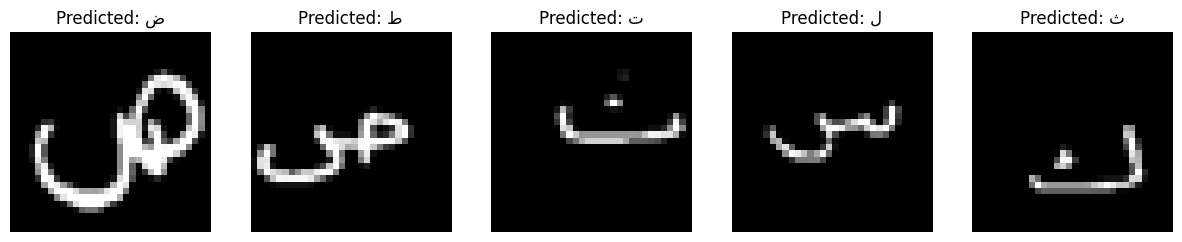

In [ ]:
# Predictions using SVM
predictions_svm = classifier.predict(Normalized_test_images)
print('Predictions using SVM')

# Choose random images for visualization
visualization_images_svm = 5
fig, axs_svm = plt.subplots(1, visualization_images_svm, figsize=(15, 5))

for i in range(visualization_images_svm):
    random_index_svm = np.random.randint(len(Normalized_test_images))
    image_svm = Normalized_test_images.iloc[random_index_svm, :]
    image_svm = reconstruct(image_svm)
    predicted_label_svm = predictions_svm[random_index_svm]

    axs_svm[i].imshow(image_svm.T, cmap='gray', origin='upper')
    axs_svm[i].set_title(f"Predicted: {Arabic_letters[predicted_label_svm]}")
    axs_svm[i].axis('off')

plt.show()

In [ ]:
Confusion_Matrix = confusion_matrix(test_labels, y_predicted)

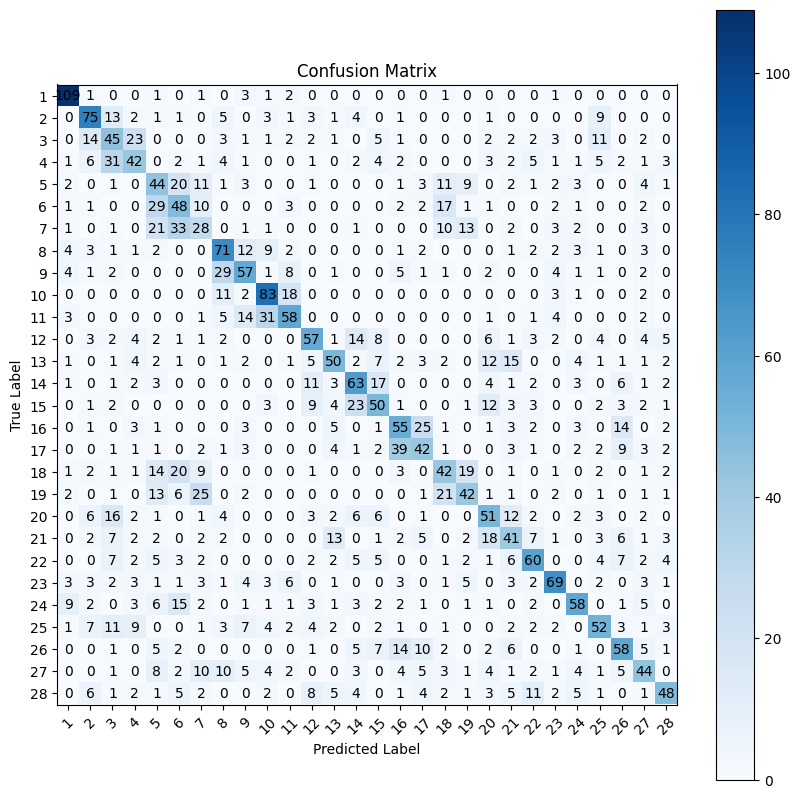

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(Confusion_Matrix, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
unique_labels = np.unique(train_labels.iloc[:, 0])
plt.xticks(range(len(unique_labels)), unique_labels, rotation=45)
plt.yticks(range(len(unique_labels)), unique_labels)
for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        plt.text(j,i,Confusion_Matrix[i, j],ha='center', va='center')
plt.show()

In [ ]:
f1_score_macro_svm = f1_score(test_labels, y_predicted, average='macro')
print("Average F1-Score (Macro) for SVM:", f1_score_macro_svm)

Average F1-Score (Macro) for SVM: 0.45851485394528885


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Normalized_train_images, train_labels, test_size = 0.3, random_state = 42)

In [ ]:
k_vals = [2,3,4,5,6]
f1_scores = []
max_f1_score = 0
best_k = 0
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_predicted = knn.predict(x_test)
    f1_score_macro = f1_score(y_test, y_predicted, average='macro')
    if(max_f1_score < f1_score_macro):
      max_f1_score = f1_score_macro
      best_k = k
    f1_scores.append(f1_score_macro)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

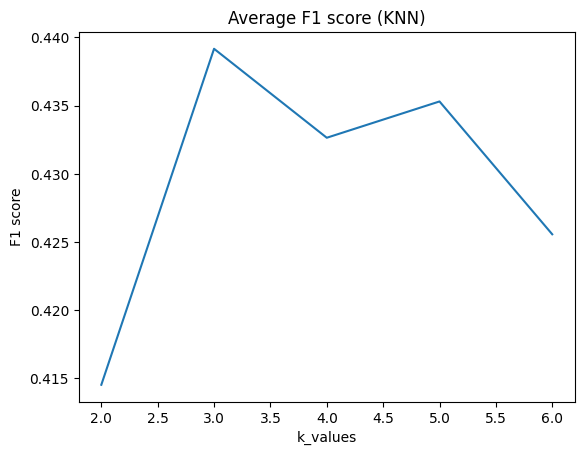

In [ ]:
plt.plot(k_vals, f1_scores)
plt.xlabel("k_values")
plt.ylabel("F1 score")
plt.title("Average F1 score (KNN)")
plt.show()

In [ ]:
print(f"The Maximum value of f1_score = {max_f1_score}\n at K = {best_k}")

The Maximum value of f1_score = 0.43916443390666066
 at K = 3


In [ ]:
k_value = best_k
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(Normalized_train_images, train_labels)
y_predicted = knn.predict(Normalized_test_images)
f1_score_macro_knn = f1_score(test_labels, y_predicted, average='macro')
print("Average F1-Score (Macro):", f1_score_macro_knn)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Average F1-Score (Macro): 0.503817073890851


In [ ]:
Confusion_Matrix = confusion_matrix(test_labels, y_predicted)

Predictions using KNN


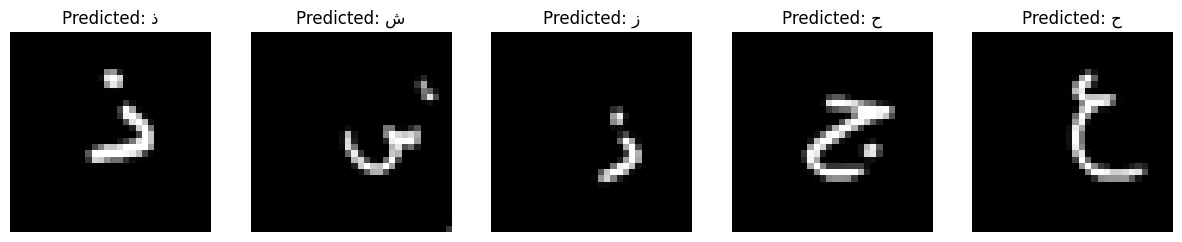

In [ ]:
predictions_knn = knn.predict(Normalized_test_images)
print('Predictions using KNN')
# Choose random images for visualization
visualization_images_knn = 5
fig, axs_knn = plt.subplots(1, visualization_images_knn, figsize=(15, 5))

for i in range(visualization_images_knn):
    random_index_knn = np.random.randint(len(Normalized_test_images))
    image_knn = Normalized_test_images.iloc[random_index_knn, :]  # Get the image
    image_knn = reconstruct(image_knn)
    predicted_label_knn = predictions_knn[random_index_knn]  # Get the predicted label

    # Display the image and its predicted label
    axs_knn[i].imshow(image_knn.T, cmap='gray', origin='upper')  # Set origin to upper
    axs_knn[i].set_title(f"Predicted: {Arabic_letters[predicted_label_knn]}")
    axs_knn[i].axis('off')
plt.show()

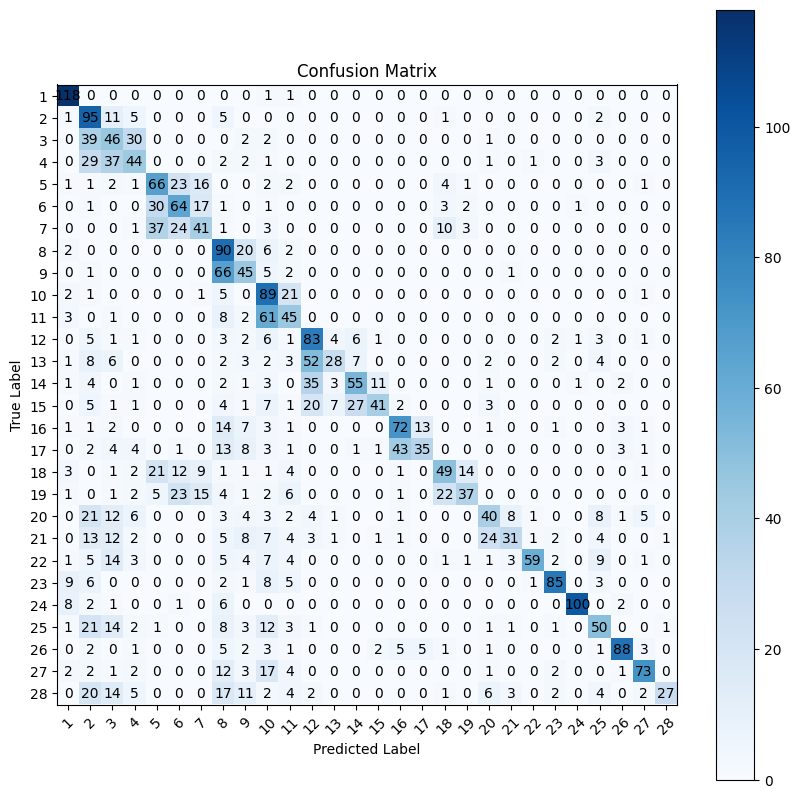

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(Confusion_Matrix, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
unique_labels = np.unique(train_labels.iloc[:, 0])
plt.xticks(range(len(unique_labels)), unique_labels, rotation=45)
plt.yticks(range(len(unique_labels)), unique_labels)
for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        plt.text(j,i,Confusion_Matrix[i, j],ha='center', va='center')
plt.show()

In [ ]:
# Neural Network 1st Model
train_images, test_images = Normalize_Image(train_images, test_images)

# Prepare data
X_train = np.array(train_images).reshape(-1, 32, 32, 1)
y_train = np.array(train_labels)
X_test = np.array(test_images).reshape(-1, 32, 32, 1)
y_test = np.array(test_labels)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_classes = len(label_encoder.classes_)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/30
378/378 [==============================] - 8s 13ms/step - loss: 2.3277 - accuracy: 0.3060 - val_loss: 1.7705 - val_accuracy: 0.4234 - lr: 0.0010
Epoch 2/30
378/378 [==============================] - 6s 15ms/step - loss: 1.5050 - accuracy: 0.5004 - val_loss: 1.4309 - val_accuracy: 0.5246 - lr: 0.0010
Epoch 3/30
378/378 [==============================] - 4s 12ms/step - loss: 1.2080 - accuracy: 0.5842 - val_loss: 1.2653 - val_accuracy: 0.5796 - lr: 0.0010
Epoch 4/30
378/378 [==============================] - 5s 13ms/step - loss: 1.0232 - accuracy: 0.6443 - val_loss: 1.2083 - val_accuracy: 0.6004 - lr: 0.0010
Epoch 5/30
378/378 [==============================] - 5s 14ms/step - loss: 0.8853 - accuracy: 0.6892 - val_loss: 1.1728 - val_accuracy: 0.6146 - lr: 0.0010
Epoch 6/30
378/378 [==============================] - 4s 12ms/step - loss: 0.8017 - accuracy: 0.7161 - val_loss: 1.0809 - val_accuracy: 0.6138 - lr: 0.0010
Epoch 7/30
378/378 [==============================] - 6s 17ms/st

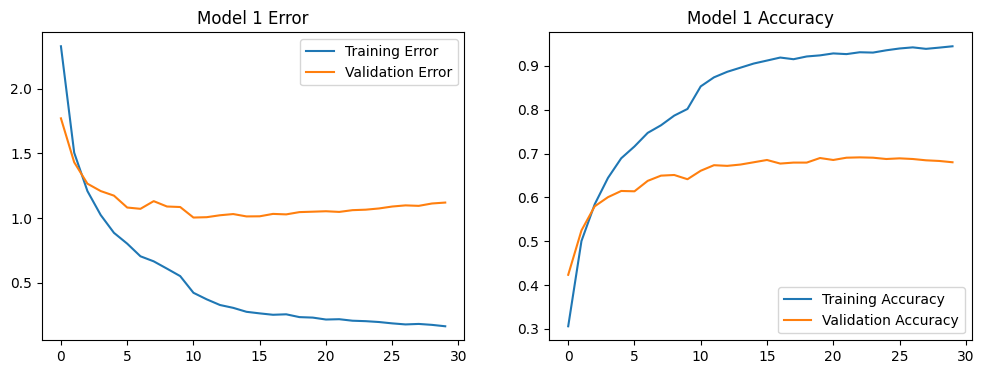

In [ ]:
from keras.layers import Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau


# Model 1
model_1 = Sequential([
    # Input layer
    Flatten(input_shape=(32, 32, 1)),

    # Hidden layers
    # Dense(500, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.1),  # Dropout layer
    # Dense(256, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.1),  # Dropout layer
    # Dense(128, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.1),  # Dropout layer
    # Dense(64, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.1),  # Dropout layer

############################################## 0.2 dropout a3la haga w 0.19

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),  # Dropout layer
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),  # Dropout layer
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),  # Dropout layer

    Dense(num_classes, activation='softmax')

])


model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train Model 1
history_1 = model_1.fit(X_train, y_train_encoded, epochs=30, batch_size=32, validation_split=0.1, callbacks=[ reduce_lr])
#history_1 = model_1.fit(X_train, y_train_encoded, epochs=30, batch_size=32, validation_split=0.1)

.
# Plot error and accuracy curves for Model 1
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Error')
plt.plot(history_1.history['val_loss'], label='Validation Error')
plt.legend()
plt.title('Model 1 Error')

plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 1 Accuracy')
plt.show()

Epoch 1/30
147/147 [==============================] - 4s 19ms/step - loss: 3.0474 - accuracy: 0.1030 - val_loss: 2.6542 - val_accuracy: 0.1912
Epoch 2/30
147/147 [==============================] - 2s 15ms/step - loss: 2.3367 - accuracy: 0.2436 - val_loss: 2.3345 - val_accuracy: 0.2535
Epoch 3/30
147/147 [==============================] - 2s 15ms/step - loss: 2.0455 - accuracy: 0.3208 - val_loss: 2.1212 - val_accuracy: 0.3199
Epoch 4/30
147/147 [==============================] - 2s 15ms/step - loss: 1.8083 - accuracy: 0.3919 - val_loss: 1.9265 - val_accuracy: 0.3834
Epoch 5/30
147/147 [==============================] - 3s 19ms/step - loss: 1.6048 - accuracy: 0.4501 - val_loss: 1.7604 - val_accuracy: 0.4430
Epoch 6/30
147/147 [==============================] - 3s 20ms/step - loss: 1.4010 - accuracy: 0.5123 - val_loss: 1.6674 - val_accuracy: 0.4603
Epoch 7/30
147/147 [==============================] - 2s 16ms/step - loss: 1.2528 - accuracy: 0.5496 - val_loss: 1.5827 - val_accuracy: 0.4759

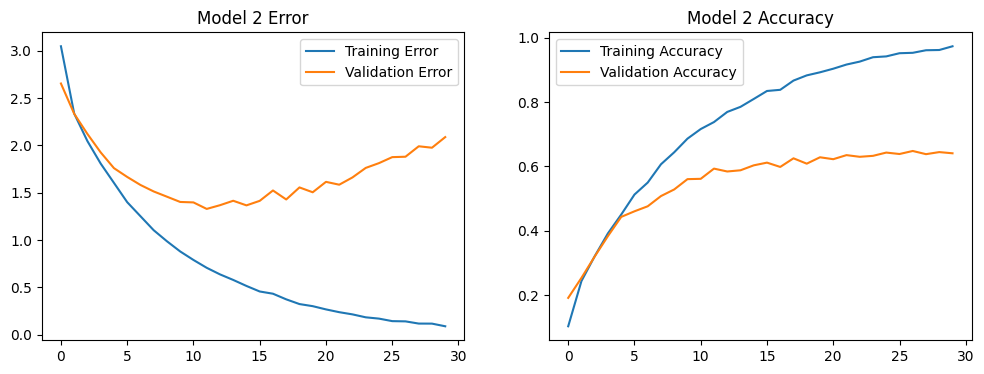

In [ ]:
# Model 2
model_2 = Sequential([
    # Input layer
    Flatten(input_shape=(32, 32, 1)),

    # Hidden layers
    Dense(512, activation='sigmoid'),
    Dense(345, activation='tanh'),
    Dense(78, activation='relu'),
    Dense(64, activation='relu'),

    # Output layer
    Dense(num_classes, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2
history_2 = model_2.fit(X_train, y_train_encoded, epochs=30, batch_size=64, validation_split=0.3)

# Plot error and accuracy curves for Model 2
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Training Error')
plt.plot(history_2.history['val_loss'], label='Validation Error')
plt.legend()
plt.title('Model 2 Error')

plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 2 Accuracy')
plt.show()



In [ ]:
best_nn_model= max([(history_2.history['val_accuracy'][-1],'Model 2'),(history_1.history['val_accuracy'][-1],'Model 1')])
print(f"Suggested Best Neural Network Model: {best_nn_model[1]}", ' with validation accuracy:', best_nn_model[0])

Suggested Best Neural Network Model: Model 1  with validation accuracy: 0.680059552192688


In [ ]:
model_1.save('model_1.keras')  # Save Model 1


In [ ]:
from keras.models import load_model
loaded_model_1 = load_model('model_1.keras')  # Load Model 1


105/105 [==============================] - 1s 4ms/step
Predictions using Neural Network


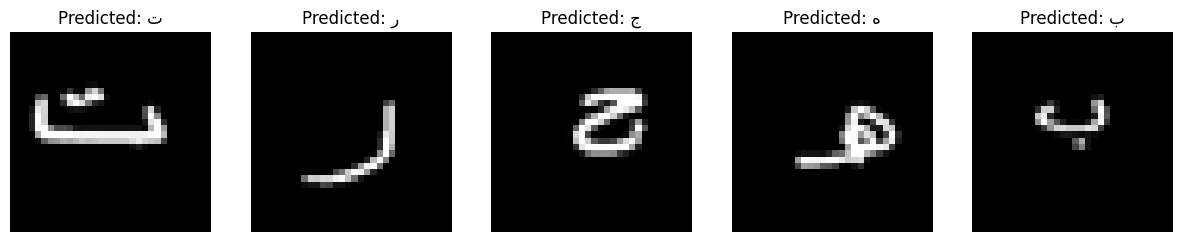

In [ ]:
predictions = model_1.predict(X_test)
print('Predictions using Neural Network')

# Choose random images for visualization
visualization_images = 5
fig, axs = plt.subplots(1, visualization_images, figsize=(15, 5))

for i in range(visualization_images):
    random_index = np.random.randint(len(X_test))
    image = X_test[random_index]  # Get the image
    image = np.transpose(image, (1,0,2))
    predicted_label = np.argmax(predictions[random_index])  # Get the predicted label

    # Display the image and its true/predicted labels
    axs[i].imshow(image.squeeze(), cmap='gray')  # Set origin to upper
    axs[i].set_title(f"Predicted: {Arabic_letters[predicted_label]}")
    axs[i].axis('off')

plt.show()

In [ ]:
print(predictions.shape)

(3360, 28)


In [ ]:
Arabic_letters = [ 'أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د','ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط',
    'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م','ن', 'ه', 'و', 'ي']

In [ ]:

def plot_image(i,img , true_label,predictions_array ):
  true_labell = true_label[i]
  imgg = img[i]

  true_labell = int(true_labell)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  rotated_img = np.rot90(imgg, k=-1)
  rotated_img_flip = np.flip(rotated_img , axis = 1)
  plt.imshow(rotated_img_flip, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_labell:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted Label : {} {:2.0f}% True label : {}".format(Arabic_letters[predicted_label],
                                100*np.max(predictions_array),
                                Arabic_letters[true_labell-1]),
                                color=color)

# Define the function to plot the bar chart
def plot_bar_chart(predictions):
    plt.bar(range(len(predictions)), predictions, color="#777777")
    plt.xticks(range(len(predictions)), Arabic_letters)
    plt.ylim([0, 1])
    plt.xlabel("Predicted Label")
    plt.ylabel("Probability")
    plt.title("Predictions for All Labels")


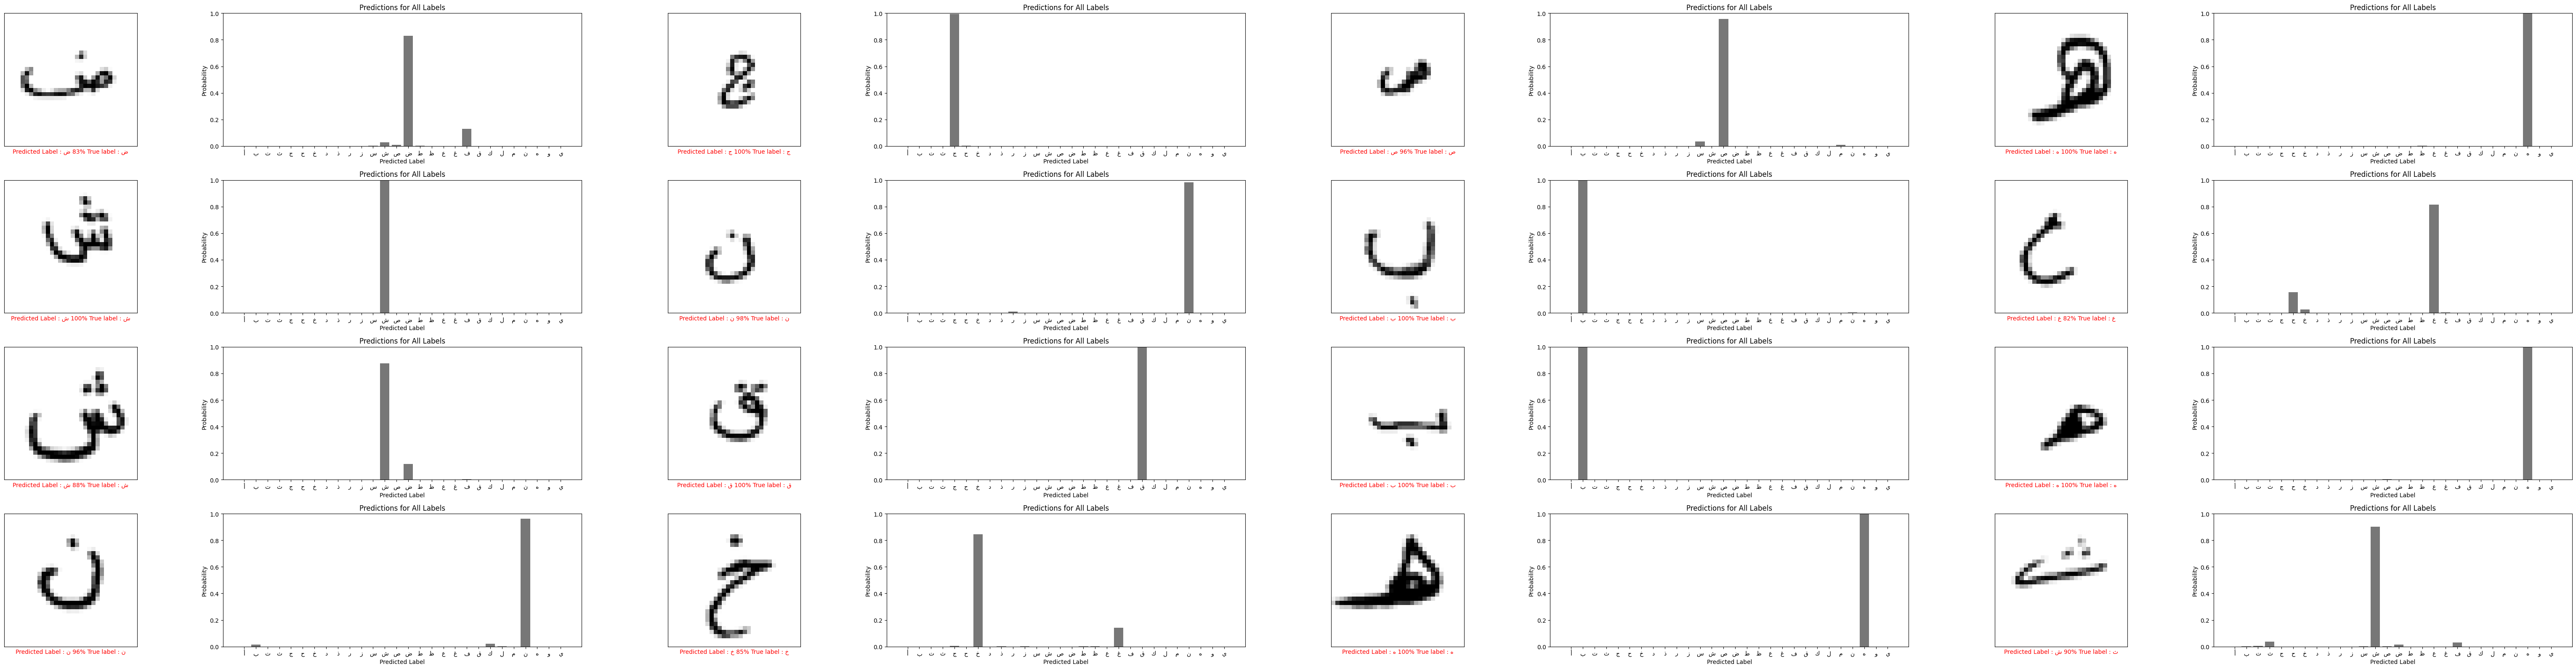

In [ ]:

num_rows = 4
num_cols = 4
plt.figure(figsize=(4*4*num_cols, 4*num_rows))

for i in range(num_rows):
    for j in range(num_cols):
        q = np.random.randint(len(X_test))
        q=q%3360 # Random index for each iteration
        plt.subplot(num_rows, 2*num_cols, 2*i*num_cols + 2*j + 1)
        plot_image((q*num_cols + j)%3360, X_test, y_test, predictions[(q*num_cols + j)%3360])

        plt.subplot(num_rows, 2*num_cols, 2*i*num_cols + 2*j + 2)
        plot_bar_chart(predictions[(q*num_cols + j)%3360])

plt.tight_layout()
plt.show()

105/105 [==============================] - 0s 4ms/step


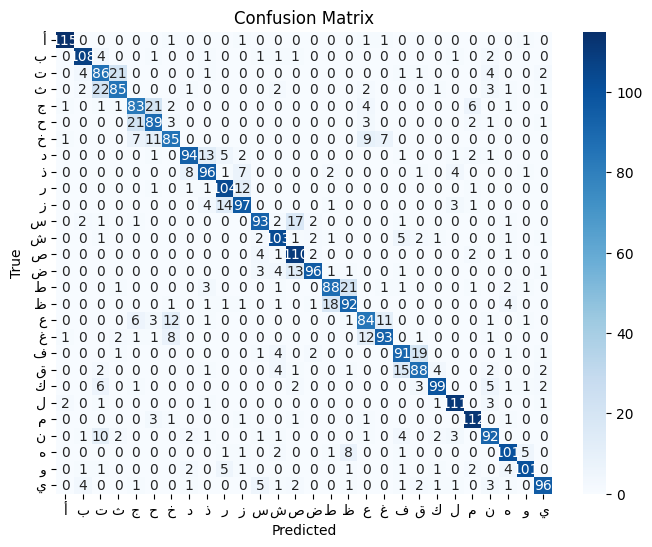


Average F1 Score of Neural Network: 0.8014776365669344


In [ ]:
predictions_test = model_1.predict(X_test)

# Convert one-hot encoded labels back to categorical labels
y_test_labels = np.argmax(y_test_encoded, axis=1)
predicted_labels_test = np.argmax(predictions_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, predicted_labels_test)

# Average F1 Score
average_f1_NN = f1_score(y_test_labels, predicted_labels_test, average='macro')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=Arabic_letters, yticklabels=Arabic_letters)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("\nAverage F1 Score of Neural Network:", average_f1_NN)

In [ ]:
best_model = max([(f1_score_macro_svm, 'SVM'), (f1_score_macro_knn, 'k-NN'), (average_f1_NN, 'Neural Network')])
print(f"Suggested Best Model: {best_model[1]} with Average F1 Score: {best_model[0]}")

Suggested Best Model: Neural Network with Average F1 Score: 0.8014776365669344
